# Capítulo 1 - Regressão Linear

## Nesse capítulo vamos estudar:

#### 1. [Definição de Regressão](#1)

#### 2. [Aquisição e Manipulação de Dados](#2)

#### 3.  [Visualisação de Dados](#3)

#### 4. [Princípios Básicos de Regressão Linear](#4)

#### 5. [Métodos de Avalição para Regressão](#5)

#### 6. [Equação Normal](#6)

#### 7. [Conclusão e Desafio](#7)
___
___
___

<a id="1"></a>
# 1. O Conceito de Regressão

Regressão é uma técnica muito comum em Aprendizado de Máquina, que é usada para estudar relacionamentos entre variáveis independentes para prever um resultado de uma variável dependente.

Nesse caso, uma Regressão Linear é usada para prever um dado "Y" dado uma ou mais variáveis X, Z,..., etc. Vamos ver essa técnica em prática para ter uma melhor representação.

In [1]:
## Primeiramente, vamos verificar nosso ambiente e fazer a importação das bibliotecas nescessárias.

# Vamos usar uma versao do Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)
sys.path.append("..")

# E uma versao da Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Vamos importar Numpy para certos calculos matematicos e Pandas para analize e manipulação de dados.
import numpy as np
import pandas as pd

# Vamos definar a nossa random seed, para que os resultados sejam replicaveis.
np.random.seed(42)

# E finalmente, vamos importar a biblioteca MatplotLib e Seaborn para visualizar os dados.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
mpl.rc('figure', figsize=(14,4.5))
mpl.rc('axes', titlesize=20)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.facecolor'] = 'whitesmoke'
mpl.rcParams.update({"axes.grid" : True, "grid.color": "grey"})

### Nota: caso haja qualquer dúvida sempre Bibliotecas ou suas funções, as suas documentações estão disponíveis
### no arquivo README.txt. Você também pode usar a função "help(**insira a funcao aqui**)" para ter uma
### explicação detalhada dentro do notebook.

<a id="2"></a>
___
# 2. Aquisição e Manipulação dos Dados
## Vamos abrir e analizar nosso dataset. 
O dataset que usaremos foi obtido no site <a href=www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm>Kaggle</a>. Nesse site, além de vários datasets públicos, também contem competições e informações para você desenvolver projetos de Aprendizado de Máquina. Recomendo prestar uma visita e por a mão a massa após o termino desse Notebook.

### Sobre o dataset:

Esse dataset contém as informações essenciais sobre o preço das ações da Apple Inc.(AAPL), de 2010 a 2020. 
Vamos utiliza-lo de forma educativa, para tentar prever os preços das ações com base nos seus dados anteriores.
<br><br><br>

In [2]:
# Vamos importar o dataset usando o Pandas

aapl = pd.read_csv("../datasets/aapl-stocks.csv")

In [3]:
# Agora vamos fazer uma rápida análise

## A função do Pandas ".head()" mostra as 5 primeiras amostrar dos nossos dados.
## Isso é muito útil, pois podemos ter uma noção de cada caracteristica dos nosso dataset.
aapl.head()

,Date,Close,Volume,Open,High,Low
0,02/28/2020,273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


>Isso é um dataset, um conjunto de dados em forma de uma matriz, com cada coluna sendo uma característica do nosso dado, e cada linha, uma amostra do mesmo. Nesse caso temos o dado preço de ações da Apple Inc. Cada linha são suas informações de acordo com o dia que esse dado foi gerado. Nesse dataset, temos 2518 amostra(dias e seus respectivos preços), e cada variável, ou característica, são suas respectivas colunas, ou seja, temos 6 caracteŕisticas.

>*Podemos observar que os preços então representados em dólar americano, e contendo o seu símbolo. Como precisamos dos números para fazer os cálculos, vamos converter essas moedas e floats.*

<br>


In [4]:
# Vamos selecionar as colunas com $ e transformalas em float

aapl[["Close", "Open", "High", "Low"]] = aapl[["Close", "Open", "High", "Low"]].replace("[ $,]", "", regex=True).astype(float)
aapl.head()

,Date,Close,Volume,Open,High,Low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.10,286.00,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.50
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23


In [5]:
# Agora vamos analizar as informações numéricas de cada coluna.

aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2518 non-null   object 
 1   Close   2518 non-null   float64
 2   Volume  2518 non-null   int64  
 3   Open    2518 non-null   float64
 4   High    2518 non-null   float64
 5   Low     2518 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.2+ KB


>*Podemos notar que as colunas foram formatadas com sucesso, e não a nenhum valor nulo para nos preocuparmos. Porém ainda precisamos lidar com a coluna "Data", pois ela está formatada como um Objeto(um texto), e queremos utiliza-la no formato numérico "datetime", pois vamos usar esses dados de forma cronológica.*
<br>

In [6]:
# Vamos formatar essa coluna para "datetime".

aapl["Date"] = pd.to_datetime(aapl["Date"]).dt.date
aapl["Date"].describe(datetime_is_numeric=True)

count           2518
unique          2518
top       2020-02-28
freq               1
Name: Date, dtype: object

In [7]:
# Vamos adicionar uma coluna "Dias" para representar os dias que se passaram desde a primeira acao
aapl["Dias"] = np.arange(2517, -1, -1)
aapl

,Date,Close,Volume,Open,High,Low,Dias
0,2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700,2517
1,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,2516
2,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,2515
3,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,2514
4,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,2513
...,...,...,...,...,...,...,...
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,4
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,3
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,2
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,1


>Quase pronto, porém ainda falta mais um passo. Como vamos usar dados cronológicos, é uma boa prática usar as dados em ordem ascendente. Então vamos ordenar nosso dataset.

In [8]:
aapl = aapl.sort_index(ascending=False).reset_index(drop=True)
aapl

,Date,Close,Volume,Open,High,Low,Dias
0,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,0
1,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,1
2,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,2
3,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,3
4,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,4
...,...,...,...,...,...,...,...
2513,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,2513
2514,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,2514
2515,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,2515
2516,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,2516


<a id="3"></a>
___
# 3. Visualizacão dos Dados

Agora que manipulamos os dados corretamente, vamos criar um gráfico cronológico visualiza-lo para comprender o nosso objetivo.

Vamos definir nosso vetor "X" para representar os dias, poŕem, em vez de utilizar a data como as variáveis, vamos usar nossa coluna dos dias que se passaram.

Vamos definir um vetor "Y" para representar o preço de fechamento das ações.

E vamos também definir um vetor "Z", representando os volumes diários.
<br><br>

In [9]:
#Vamos criar uma coluna ascendente 
X = aapl["Date"].copy()
y = aapl["Close"].copy()
Z = aapl["Volume"].copy()

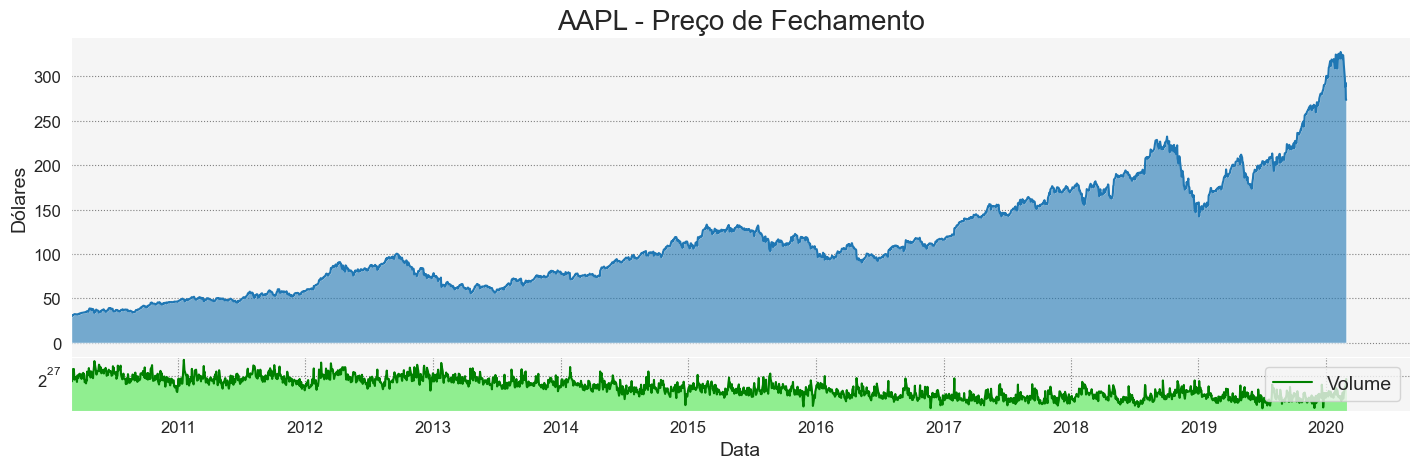

In [10]:
#Usando a biblioteca Matplotlib, vamos plotar o preço de fechamento e o volume para entender melhor nosso dataset.

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [6, 1]}, num="1")
ax1, ax2 = ax

ax1.plot(X, y, label="Preço de Fechamento")
ax1.fill_between(X, 0, y, alpha=0.6)
ax1.get_xaxis().set_visible(False)
ax1.set_title("AAPL - Preço de Fechamento", fontsize = 20)
ax1.set_xlim(min(X))
ax1.set_ylabel("Dólares")

ax2.plot(X, Z,c="g", label="Volume")
ax2.fill_between(X, 0, Z, color="lightgreen")
ax2.set_xlim(min(X))
ax2.set_yscale('log',base=2)
ax2.legend(fontsize=14)

plt.xlabel("Data")

plt.tight_layout(pad=0)

<a id="4"></a>
___
# 4. Construindo Nosso Primeiro Modelo de Regressão

A partir desse gráfico vamos construir um Modelo de Regressão, ou seja, vamos criar uma linha que segue o padrão do nosso gráfico. 

Para criar uma linha reta, dado dois vetores, a equação é a seguinte:

# <center> $$h(X) = mX + b$$ </center>


- ***h(x)*** - função linear que retorna o vetor $\bf{\hat{y}}$, que é o vetor previsão.
- **X** - vetor de variáveis independentes.
- **m** - coeficiente angular da reta. - *Controla a inclinação*
- **b** - coeficente linear da reta.   - *Controla a altura, ou seja, onde a reta cruza o eixo* ***y***.
---
Apos criar uma reta que melhor corresponde a relação entre o vetor **X**("Data") e o vetor **y**("Preço de Fechamento"), podemos usar a nossa equação da reta, para descobrir o "Preço de Fechamento" apenas aplicando a
"Data" nessa equação.

___
### Para encontrar a inclinação, usamos a  fórmula do coeficiente angular:

# <center>$$m = \frac{y_{1} - y_{0}}{x_{1} - x_{0}}$$</center>


In [12]:
# A partir de agora, como vamos fazer alguns calculos com vetores, vamos definir o vetor "X"
# como a quantidade de dias passados, pois valores datetime64 nao podem ser operados
X = aapl["Dias"].copy()

x0 = X[0] #dia 0
y0 =  y[0] #primeiro preco

x1 = X.iloc[-1] #dias passados no ultimo dia
y1 = y.iloc[-1] #ultimo preco

x0,y0, x1, y1

(0, 29.8557, 2517, 273.36)

In [13]:
# Vamos escrever uma função para a fórmula do coeficiente angular

def coef_angular(x1, x0, y1, y0):
    m = (y1-y0)/(x1-x0)
    return m

m = coef_angular(x1, x0, y1, y0)

print("\nm =",  m)


m = 0.09674386174016686


___
### Para computar o coeficiente linear, usamos a função da reta com o nosso coeficiente angular encontrado.

*Como ***b*** é onde a reta cruza o eixo **y**, ou seja, onde **X** equivale a 0.*

### Logo:

# <center> $$y_{0} = mx_{0} + b$$ </center>
# <center> $$b = y_{0} - mx_{0}$$ </center>

In [14]:
# Vamos escrever uma função para a fórmula do coeficiente linear 

def coef_linear(y0, m, x0):
    b = y0 - m * x0
    return b

b = coef_linear(y0, m, x0)

print("\nb = ",  b)


b =  29.8557


> *Neste caso, como começamos a nossa linha a partir do ponto 0, ou seja $x_{0} = 0$, ***b*** é igual a $y_{0}$.*

___
### Com ***m*** e ***b*** em mãos, podemos criar uma função reta que segue a tendencia do primeiro e último preço.
<br></br>

In [15]:
def funcao_linear(X, m, b):
    return m*X + b

>Com a função contruída, podemos utiliza-la para transformar nosso vetor **X** e ter uma representação de como seriam os nossos preços, caso todos eles seguissem a tendência do primeiro e último preço.


In [16]:
x0xn = funcao_linear(X, m, b) #Vamos chamar os valores tranformados em x0xn
x0xn

0        29.855700
1        29.952444
2        30.049188
3        30.145932
4        30.242675
           ...    
2513    272.973025
2514    273.069768
2515    273.166512
2516    273.263256
2517    273.360000
Name: Dias, Length: 2518, dtype: float64

<br></br>
### Vamos criar uma tabela para comparar nossas previsões e os valores reais.

In [17]:
comp = pd.DataFrame({"Previsto": x0xn,  "Real": y})
comp

,Previsto,Real
0,29.855700,29.8557
1,29.952444,29.8357
2,30.049188,29.9043
3,30.145932,30.1014
4,30.242675,31.2786
...,...,...
2513,272.973025,298.1800
2514,273.069768,288.0800
2515,273.166512,292.6500
2516,273.263256,273.5200


<br></br>
>Geramos uma função que recebe os dias passados e nos retorna os valores das ações com base na relação entre o primeiro e último preço.<br></br>
Então, se pararmos pra pensar, essa função, além de nos retornar os preços com base nos dias contidos do dataset, também pode ser usada para retornar os preços nos dias futuros, que não temos.

### Então, vamos experimentar usar essa função para prever os valores nos dias futuros.

<br>

In [18]:
# Vamos criar um vetor para os dias futuros, que não estão em nosso dataset.
# Se x1 é o último dia, o próximo dia futuro seria x1+1, vamos chama-lo de x2

x2 = x1+1

# Invéz de usar apenas um valor, vamos usar um conjunto de dias futuros, por exemplo
# Vamos usar um conjunto de 1 ano à frente do último dia
# Vamos chamar de x3, o valor de 1 ano após x1

x3 = x1+365

# Agora vamos criar um vetor contendo todos os dias do próximo ano
dias_futuros = np.arange(x2, x3)
dias_futuros

array([2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528,
       2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539,
       2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550,
       2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561,
       2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572,
       2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583,
       2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594,
       2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616,
       2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627,
       2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638,
       2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649,
       2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660,
       2661, 2662, 2663, 2664, 2665, 2666, 2667, 26

<br></br>
>Podemos usar esse vetor que criamos e transforma-lo usando a nossa Função Linear para obtermos uma predição dos valores com base nessa função.

In [19]:
pred = funcao_linear(dias_futuros, m, b) #nossas predições
pred

array([273.45674386, 273.55348772, 273.65023159, 273.74697545,
       273.84371931, 273.94046317, 274.03720703, 274.13395089,
       274.23069476, 274.32743862, 274.42418248, 274.52092634,
       274.6176702 , 274.71441406, 274.81115793, 274.90790179,
       275.00464565, 275.10138951, 275.19813337, 275.29487723,
       275.3916211 , 275.48836496, 275.58510882, 275.68185268,
       275.77859654, 275.87534041, 275.97208427, 276.06882813,
       276.16557199, 276.26231585, 276.35905971, 276.45580358,
       276.55254744, 276.6492913 , 276.74603516, 276.84277902,
       276.93952288, 277.03626675, 277.13301061, 277.22975447,
       277.32649833, 277.42324219, 277.51998605, 277.61672992,
       277.71347378, 277.81021764, 277.9069615 , 278.00370536,
       278.10044923, 278.19719309, 278.29393695, 278.39068081,
       278.48742467, 278.58416853, 278.6809124 , 278.77765626,
       278.87440012, 278.97114398, 279.06788784, 279.1646317 ,
       279.26137557, 279.35811943, 279.45486329, 279.55

<br></br>
>Até agora, tudo certo, conseguimos construir uma função que pode nos ajudar a prever os valores das ações da Apple com base no primeiro e último valor observado. Porém é um pouco difícil analizar aos valores reais e previstos apenas observando os números.

<br></br>
#### Observemos abaixo os valores reais e previstos no gráfico:


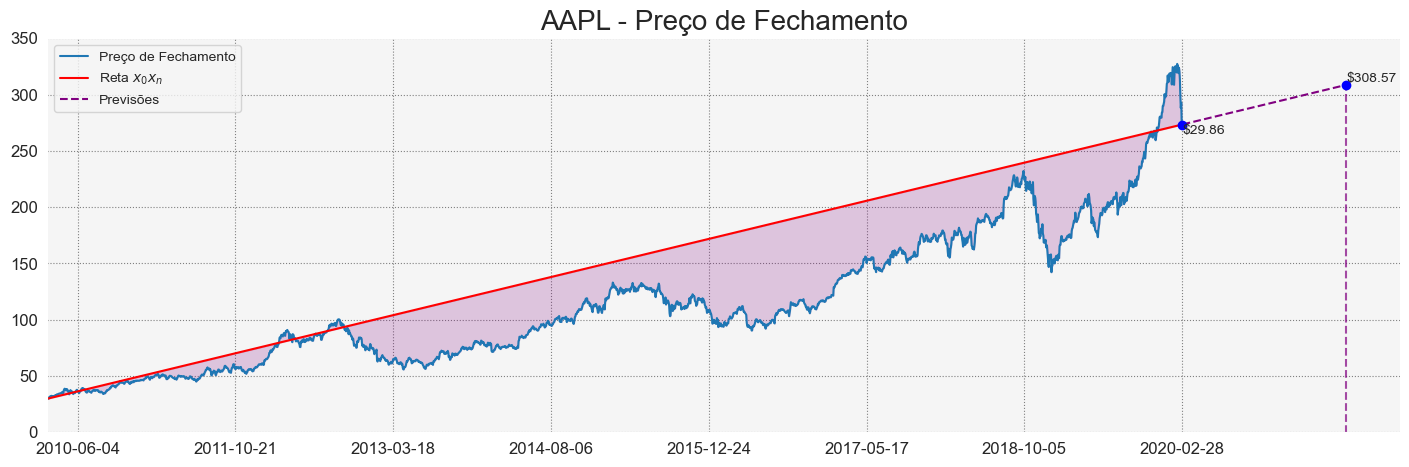

In [20]:
fig = plt.figure("2")
ax = plt.gca()


plt.title("AAPL - Preço de Fechamento", fontsize = 20)

plt.plot(X, y, label="Preço de Fechamento")
plt.plot(X ,x0xn, "r", label="Reta $x_{0}x_{n}$")
plt.plot(dias_futuros, pred, "purple", ls="--", label="Previsões")


plt.plot(x1, x0xn.iloc[-1], "bo")
plt.text(x1, x0xn.iloc[-1], f"${x0xn[0]:.2f}", verticalalignment="top")

plt.vlines(dias_futuros[-1], -10, pred[-1], colors= "purple", ls="--", alpha=0.7)
plt.plot(dias_futuros[-1], pred[-1], "bo")
plt.text(dias_futuros[-1], pred[-1], f"${pred[-1]:.2f}", verticalalignment="bottom")

plt.fill_between(X, y, x0xn, color="purple", alpha=0.2)
plt.axis([0, 3000, 0, 350])


plt.legend()
ax.set_xticks(X[::-350])
ax.set_xticklabels(aapl["Date"][::-350])
plt.tight_layout(pad=0.1)

## Pronto!
<br>
Contruimos o nosso primeiro algoritmo de Regressão. Porém ele não parece ser muito convincente, pois utilizamos apenas as relação entre a primeira e a ultima amostra do nosso dataset. Podemos notar que há uma grande distancia na maioria dos dias entre a os preços reais e a nossa simples reta.<br></br>
Ou talvez ele seja perfeito, talvez a partir do último ponto, a linha dos preços siga exatamente a direção da linha que contruimos. Mesmo que não pareça provável, não há como saber com certeza, pois não sabemos o que acontece apos o último dia contido em nosso dataset. Então como eu posso avaliar uma previsão sem saber o resultado?<br></br>
Nesse caso, devemos usar um método de avalição "Treino e Teste". Esse método consiste em dividir meus dados em conjuntos de "Treino" e outro conjunto de "Teste". Utilizamos o conhunto de treino para formar o nosso modelo, ou seja, treina-lo, e em seguida, uso os dados de teste, cujo resultado já sabemos, para poder avaliar nosso modelo, sem precisar esperar dias para receber novas informações de preço e avalia-lo.<br></br>

#### Vamos então dividir nosso modelo e avaliá-lo.

___

In [21]:
#Vamos dividir o conjunto de treino ate a linha 2049, o resto se torna conjunto de teste
X_train, X_test, y_train, y_test = (X[:2250].reset_index(drop=True),
                                    X[2250:].reset_index(drop=True),
                                    y[:2250].reset_index(drop=True),
                                    y[2250:].reset_index(drop=True))

In [22]:
#Agora vamos criar uma nova reta, porem com o primeiro e ultimo valores do conjunto de treino
#Primeiro precisamos de uma funcao para descobriros coeficientes: m e b

def coef(X, y):
    x0, x1 = X[0], X.iloc[-1]
    y0, y1 = y[0], y.iloc[-1]
    
    m = (y1-y0)/(x1-x0)
    b = y0 - m*x0
    
    return m, b

m, b = coef(X_train, y_train)
print(f"m = {m}\nb = {b}") 

m = 0.06417265451311693
b = 29.8557


In [23]:
#Usando a funcao linear para obter as previsoes do teste
y_pred = funcao_linear(X_test, m, b)

#Comparando as previsoes do teste com os resultados reais(y_test)
comparacao = pd.DataFrame({"Previsto": y_pred,  "Real": y_test})
comparacao["Data"] = aapl["Date"].iloc[2250:].reset_index(drop=True)
comparacao

,Previsto,Real,Data
0,174.244173,174.24,2019-02-06
1,174.308345,170.94,2019-02-07
2,174.372518,170.41,2019-02-08
3,174.436691,169.43,2019-02-11
4,174.500863,170.89,2019-02-12
...,...,...,...
263,191.121581,298.18,2020-02-24
264,191.185753,288.08,2020-02-25
265,191.249926,292.65,2020-02-26
266,191.314099,273.52,2020-02-27


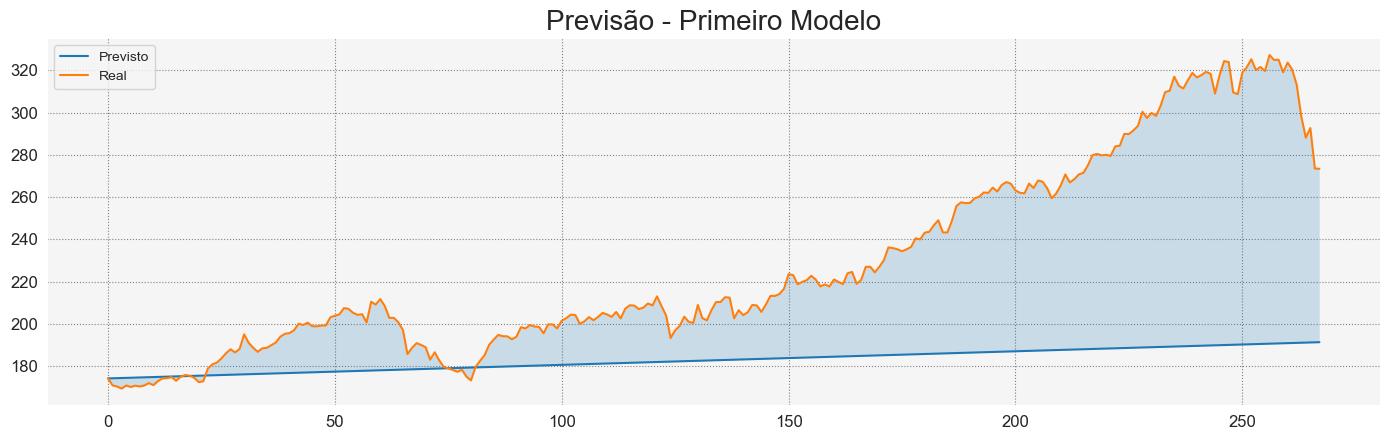

In [24]:
comparacao.plot()
plt.title("Previsão - Primeiro Modelo", fontdict={"fontsize":20})
plt.fill_between(np.arange(0, 268), comparacao["Real"], comparacao["Previsto"], alpha=0.2)
plt.tight_layout()

<a id="5"></a>
___
# 5. Avaliando Modelos de Regressão

Primeiramente, antes de desenvolvermos outros algorítmos, vamos definir nossas métricas, conhecidas como funções de custo, para podermos analizar matemáticamente nossos resultados e apoior nosso julgamento. Avaliar nosso primeiro modelo nos da uma boa métrica de comparação.

Algumas métricas bastante utilizadas para a avaliação de modelos de regressão são:

- **R²**

- **MAE**

- **MAPE**

- **MSE**

- **RMSE**

O objetivo da regressão linear é achar uma linha que tenha a melhor pontuação possível. Vamos entender cada uma.

___
##  5.1 - R²

A métrica ***R²*** representa o percentual da variância dos dados previstos pelo modelo. Os valores para ***R²***, podem variar entre números negativos até 1, onde 1 é um modelo perfeito. Ou seja, quanto maior melhor.
# <center> $$R² (y, \hat{y}) = 1  - \frac{\sum_{i=1}^n (y_{i} - \hat{y}_{i})²}{\sum_{i=1}^n (y_{i} - \bar{y})²}$$

- $\mathbf{y}$ - valores verdadeiros
- $\hat{\mathbf{y}}$ - valores previstos
- $\bar{\mathbf{y}}$ - média dos valores verdadeiros

In [25]:
def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2)/ np.sum((y - np.mean(y))**2))

r2 = R2(y_test, y_pred)
print(f"R² do Primeiro Modelo: {r2:.2f}") #obtemos um score ruim

R² do Primeiro Modelo: -0.80


___
## 5.2 - MAE

A métrica **MAE** *(Mean Absolute Error)*, em português *Erro Médio Absoluto ou EMA*, como o nome sugere, nos informa a diferença média entre os valores verdadeiros e os valores previstos. Ou seja, quanto menor melhor.
# <center> $$MAE(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n|y_{i} - \hat{y}_{i}|$$

- $\mathbf{y}$ - valores verdadeiros
- $\hat{\mathbf{y}}$ - valores previstos

In [26]:
def MAE(y, y_pred):
    n = y.shape[0]
    return 1/n * np.sum(abs(y-y_pred))

mae = MAE(y_test, y_pred)
print(f"MAE do Primeiro Modelo: ${mae:.2f}") #media de erros e de 46 dolares

MAE do Primeiro Modelo: $46.02


___
##  5.3 - MAPE

A métrica **MAPE** *(Mean Absolute Percentual Error)*, em português *Erro Médio Absoluto Percentual ou EMAP*,é parecido com a métrica **MAE** porém com uma divisão por $y_{i}$, isso nos informa a diferença percentual entre os valores verdadeiros e os valores previstos. Embora **MAPE** seja um indicador comum, ele não é recomendado para comparar modelos, já que suas métricas podem não representar com confiança a qualidade da predição.

# <center> $$MAPE(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n\frac{|y_{i} - \hat{y}_{i}|}{max(\epsilon,|y_{i}|)}$$

- $\mathbf{y}$ - valores verdadeiros
- $\hat{\mathbf{y}}$ - valores previstos
- $\epsilon$ - uma constante muito pequena, que evita uma divisão nula caso $y_{i}$ seja igual a 0.

In [55]:
def MAPE(y, y_pred):
    n = y.shape[0]
    eps = np.finfo(np.float64).eps
    y_eps = y.replace(0, eps)
    return 1/n * np.sum(abs(y-y_pred)/y_eps)

mape = MAPE(y_test, y_pred)
print(f"MAPE do Primeiro Modelo: {round(mape, 2)*100}% de diferença média.") #media de erros e de 35 dolares

MAPE do Primeiro Modelo: 18.0% de diferença média.


___
##  5.4 - MSE

A métrica **MSE** *(Mean Squared Error)*, em português *Erro Médio Quadrático*, também se parece à métrica **MAE**, porém, em vez de usar a forma absoluta dos vetores **$Y$** e **$\hat{Y}$** , usa a sua diferença quadrática. Isso aumenta a discrepância para valores muito distantes. Logo, quanto maior o **MSE**, pior o nosso modelo.
# <center> $$MSE(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n(y_{i} - \hat{y}_{i})²$$

- $\mathbf{y}$ - valores verdadeiros
- $\hat{\mathbf{y}}$ - valores previstos

In [28]:
def MSE(y, y_pred):
    n = y.shape[0]
    return 1/n * np.sum((y-y_pred)**2)

mse = MSE(y_test, y_pred)
print(f"MSE do Primeiro Modelo: ${mse:.2f}") #Um pessimo valor de MSE, lembrando que queromos isso perto de 0

MSE do Primeiro Modelo: $3764.39


##  5.5 - RMSE

A métrica **RMSE** *(Root Mean Squared Error)*, em português *Raiz do Erro Médio Quadrático*, é simplismente a raiz quadrada da métrica **MSE**. Essa métrica pode ser mais interpretável que o modelo **MSE**. Além disso, ao contrário da métrica **MAE**, essa dá mais ênfase em outliers(pontos muito distantes da que a média).
# <center> $$RMSE(y, \hat{y}) =\sqrt{\frac{1}{n}\sum_{i=1}^n(y_{i} - \hat{y}_{i})²}$$

- $\mathbf{y}$ - valores verdadeiros
- $\hat{\mathbf{y}}$ - valores previstos

In [42]:
def RMSE(y, y_pred):
    n = y.shape[0]
    MSE =  1/n * np.sum((y-y_pred)**2)
    return np.sqrt(MSE)

rmse = RMSE(y_test, y_pred)
print(f"RMSE do Primeiro Modelo: ${rmse:.2f}") #Um pessimo valor de MSE, lembrando que queromos isso perto de 0

RMSE do Primeiro Modelo: $61.35


> Agora que definimos nosso método de avaliação e testamos nosso modelo, vamos criar um dataframe com as métricas do nosso modelo, para compararmos futuramente.

In [43]:
modelos = pd.DataFrame([["Modelo-01", round(r2, 2),round(mae, 2),round(mape, 2),round(mse, 2),round(rmse, 2)]],
                       columns=["Modelo", "R²", "MAE", "MAPE", "MSE", "RMSE"])
modelos

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Modelo-01,-0.8,46.02,0.18,3764.39,61.35


>Como podemos observar pelas pontuações do nosso modelo, ele não é muito eficiente. Nesse tipo de caso, com um grande número de dados, uma relação entre apenas 2 não oferece muito apoio além de uma noção visual. Então, o que faremos?</br>
<br>Para melhor adptar uma reta em uma linha não contínua, precisamos analizar a relação de todos os pontos dos nosso conjunto de dados e encontrar uma relação de pesos que minimize minhas funções de custo. Existem várias formas de fazer isso, que veremos em breve.</br>

<a id="6"></a>
___
# 6. Equação Normal

A **Equação Normal** nos  retorna, de forma fechada e não iterativa, um vetor $\boldsymbol\theta$ que minimiza a função de custo **MSE**.

# <center> **$$\widehat{\theta}(X,Y) = (X^TX)^{⁻1}X^TY$$**

- $\boldsymbol{\widehat{\theta}}$ - vetor de pesos que minimiza a função de custo
- $\bf\it{X}$ - vetor de características
- $\bf\it{Y}$ - vetor de rótulos

>Como vamos usar as funcoes vetorizadas para calcular nossa hipotese, precisamos transformar nossos vetores em numpy arrays, para calcular suas propriedades, e também adicionar uma colunar de **"1"**, pois a primeira coluna corresponde à coluna $\boldsymbol{\theta_{0}}$, que é o nosso viés, também chamado de interceptação. Lembrando que o viés é uma constante, então multiplicar por 1 não altera seu valor.

In [44]:
#Vamos chamar nosso vetor com a coluna de 1s de X1
X1 = np.c_[np.ones((X.shape)), X.to_numpy()]
X1

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 2.515e+03],
       [1.000e+00, 2.516e+03],
       [1.000e+00, 2.517e+03]])

In [45]:
#Vamos dividir novamente o nosso novo X em treino e teste
X_train, X_test = X1[:2250], X1[2250:]

In [46]:
def equacao_normal(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

coef_en = equacao_normal(X_train, y_train) #vetor de coeficientes, ou pesos, da equacao normal

#vamos adicionar "_en" ao final das nossas variaveis para saber de qual formula ela corresponde
#EN - Equação Normal
coef_en

array([26.91542928,  0.06609733])

In [47]:
#Uma forma alternativa, é usar a função "lstsq" do modulo linalg da numpy, que retorna o mesmo resultado
np.linalg.lstsq(X_train, y_train, rcond=None)[0]

array([26.91542928,  0.06609733])

In [48]:
# sklearn LinearRegression class
from sklearn.linear_model import LinearRegression
linreg_sk = LinearRegression()
linreg_sk.fit(X_train, y_train)
linreg_sk.coef_, linreg_sk.intercept_

(array([0.        , 0.06609733]), 26.915429276035326)

> Vamos testar esses pesos usando elas na forma vetorizada da função linear. 
Relembrando que:

# <center> $$\hat{y} = \boldsymbol{\theta}^TX$$ </center>




In [49]:
def predict(X, theta):
    """Funcao Linear Vetorizada, vamos chamar de predict,
    pois vamos seguir a norma da biblioteca Scikit Learn
    """
    return np.dot(theta, X.T)

In [50]:
#Vamos prever os valores com nossos coeficientes gerados
y_pred_en = predict(X_test, coef_en)

In [51]:
def pontuacao(y_test, y_pred, nome):
    r2 = R2(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    return pd.DataFrame([[nome , round(r2, 2),round(mae, 2),round(mape, 2),round(mse, 2),round(rmse, 2)]],
                       columns=["Modelo", "R²", "MAE", "MAPE", "MSE", "RMSE"])

pontuacao_en = pontuacao(y_test, y_pred_en, "Modelo-EN")

In [52]:
modelos = modelos.merge(pontuacao_en, how="outer")
modelos

,Modelo,R²,MAE,MAPE,MSE,RMSE
0,Modelo-01,-0.80,46.02,0.18,3764.39,61.35
1,Modelo-EN,-0.73,44.69,0.17,3606.03,60.05


> Vamos comparar nossas previsções em um gráfico.

In [53]:
y_all = funcao_linear(X, m, b)  # Reta usando o primeiro modelo
y_all_en = predict(X1, coef_en) # Reta usando o modelo de equação normal

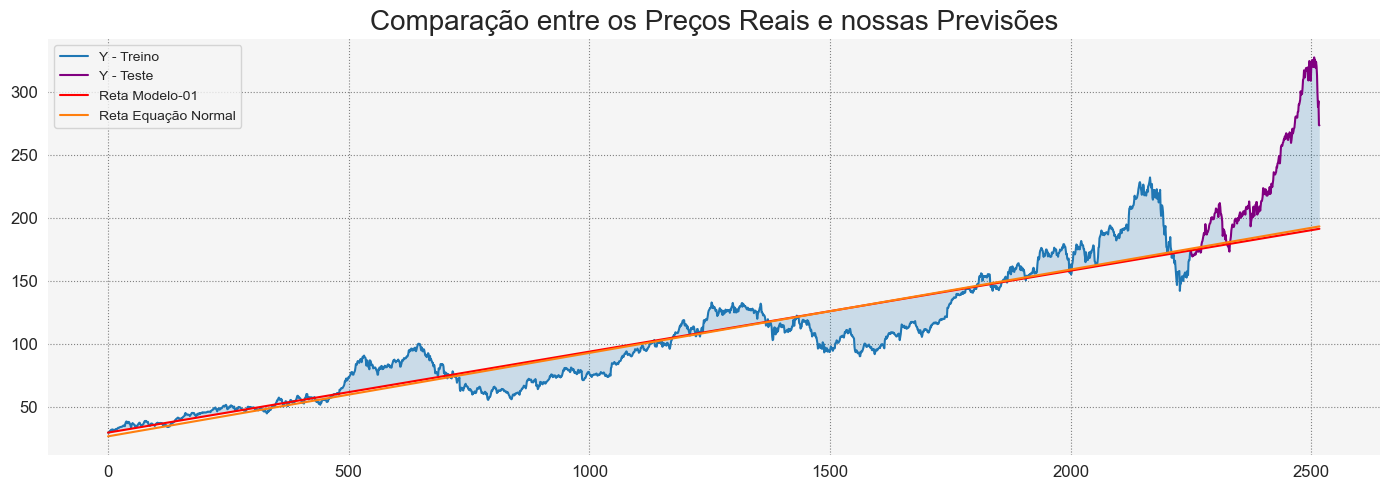

In [54]:
plt.figure("4", figsize=(14,5))
plt.title("Comparação entre os Preços Reais e nossas Previsões", fontdict = {"fontsize":20})
plt.plot(X_train[:,1], y_train, label="Y - Treino")
plt.plot(X_test[:,1], y_test, c="purple", label="Y - Teste")
plt.plot(X, y_all, "r", label="Reta Modelo-01")
plt.plot(X, y_all_en, label= "Reta Equação Normal")
plt.fill_between(np.hstack([X_train[:,1], X_test[:,1]]), y_all, np.hstack([y_train, y_test]), alpha=0.2)
plt.legend()
plt.tight_layout()

<a id="7"></a>
___
# 7. Concusão

Por mais que nosso modelo que usa a **Equação Normal** tenha nos retornado a reta com o menor erro médio para o conjunto de treino seja melhor que a nossa reta que usamos apenas o primeiro e últimos valores de *y* como base. Ainda não obtivemos um modelo bom o suficiente para conseguir prever com precisão os preços futuros. 

Esse capítulo serviu para aprendermos conceitos de Regressão e Regressão Linear, e mesmo sem termos construído um modelo robusto o suficiente, o nosso objetivo de entender as questões que foram abertas foi atingido.

Entendemos que um modelo símples como uma Regressão Linear de 1⁰ grau, não é robusto o suficiente para prever os padrões de algo complexo e com alta variância como o preço de ações. Porém, esse é apenas o primeiro passo da nossa jornada, e ao longo desse livro, vamos conhecer modelos muito mais capazes de lidar com diversos tipos de situaçoes e dados, até mesmo ações.

Logo, não se desanime, pois no próximo capítulo vamos aprender a usar uma forma mais robusta de regressão linear, capaz de se adequar a dados com uma variância maior.

<div class="alert alert-block alert-success">
    <h1>Parabéns!</h1> <h3>Você completou o Capítulo 1 do livro: <b>Ensinando Máquinas - Do Zero a Redes Neurais</b></h3>
</div>

___
# Desafio

- Como um desafio para o final desse capítulo, usando os **Preços de Abertura** como conjunto de características, crie e treine um modelo que preveja o **Preço de Fechamento** para o último dia contido no dataset e avalie sua pontuação.